## **SPEECH EMOTION RECOGNITION**

Description- Speech Emotion Recognition is a data science project that makes use of Librosa in order to carry out speech recognition. It is a process that identifies and analyses human emotions from the tone of speech. Tone and speech are important to recognize emotions, despite the fact that they are subjective. The language you will use for this project is Python, and the dataset that will facilitate it is RAVDESS.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing The Dependecies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import librosa
import IPython.display as ipd
from librosa.display import waveshow
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import train_test_s

In [ ]:
rav = '/content/drive/MyDrive/Speech Emotion Recognition/'

In [ ]:
librosa.__version__

'0.10.0.post2'

In [ ]:
# loading ravdess data

emotion = []
path = []

for i in os.listdir(rav) :
    # 20 actors in directory
    for aud in os.listdir(rav + i) :
        split = aud.split('.')[0].split('-')
        temp = int(split[2])
        
        if split[2] == '01' :
            emotion.append('neutral')
            path.append(rav + i +'/' + aud)
        if split[2] == '02' :
            emotion.append('calm')
            path.append(rav + i +'/' + aud)
        if split[2] == '03' :
            emotion.append('happy')
            path.append(rav + i +'/' + aud)
        if split[2] == '04' :
            emotion.append('sad')
            path.append(rav + i +'/' + aud)
        if split[2] == '05' :
            emotion.append('angry')
            path.append(rav + i +'/' + aud)
        if split[2] == '06' :
            emotion.append('fear')
            path.append(rav + i +'/' + aud)
        if split[2] == '07' :
            emotion.append('disgust')
            path.append(rav + i +'/' + aud)
        if split[2] == '08' :
            emotion.append('suprised')
            path.append(rav + i +'/' + aud)
            
# creating dataframe
emotion_df = pd.DataFrame(emotion,columns = ['emotion'])
path_df = pd.DataFrame(path,columns = ['path'])
rav_df = pd.concat([emotion_df,path_df],axis = 1)

In [ ]:
rav_df.head()

emotion                                               path
0   angry  /content/drive/MyDrive/Speech Emotion Recognit...
1    calm  /content/drive/MyDrive/Speech Emotion Recognit...
2   happy  /content/drive/MyDrive/Speech Emotion Recognit...
3     sad  /content/drive/MyDrive/Speech Emotion Recognit...
4    fear  /content/drive/MyDrive/Speech Emotion Recognit...

In [ ]:
rav_df.to_csv('audio.csv')

In [ ]:
audio_df=rav_df
audio_df.head(20)

emotion                                               path
0     angry  /content/drive/MyDrive/Speech Emotion Recognit...
1      calm  /content/drive/MyDrive/Speech Emotion Recognit...
2     happy  /content/drive/MyDrive/Speech Emotion Recognit...
3       sad  /content/drive/MyDrive/Speech Emotion Recognit...
4      fear  /content/drive/MyDrive/Speech Emotion Recognit...
5     happy  /content/drive/MyDrive/Speech Emotion Recognit...
6     happy  /content/drive/MyDrive/Speech Emotion Recognit...
7      calm  /content/drive/MyDrive/Speech Emotion Recognit...
8      calm  /content/drive/MyDrive/Speech Emotion Recognit...
9       sad  /content/drive/MyDrive/Speech Emotion Recognit...
10      sad  /content/drive/MyDrive/Speech Emotion Recognit...
11    angry  /content/drive/MyDrive/Speech Emotion Recognit...
12      sad  /content/drive/MyDrive/Speech Emotion Recognit...
13     fear  /content/drive/MyDrive/Speech Emotion Recognit...
14      sad  /content/drive/MyDrive/Speech Emotion Recognit...
15     fear  /content/drive/MyDrive/Speech Emotion Recognit...
16    angry  /content/drive/MyDrive/Speech Emotion Recognit...
17    happy  /content/drive/MyDrive/Speech Emotion Recognit...
18  neutral  /content/drive/MyDrive/Speech Emotion Recognit...
19     calm  /content/drive/MyDrive/Speech Emotion Recognit...

## **Visualization**

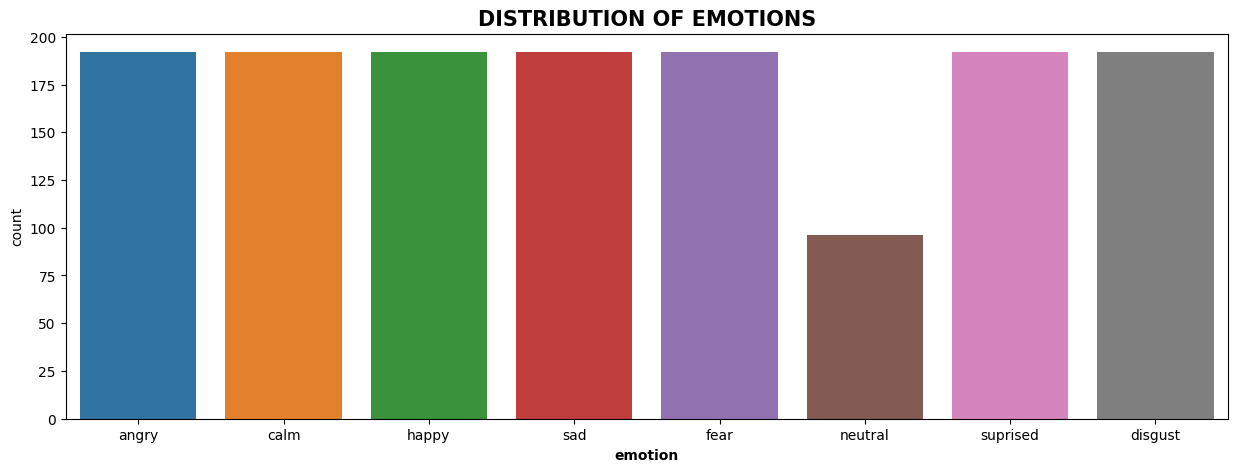

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = audio_df,x= 'emotion')
plt.title('DISTRIBUTION OF EMOTIONS',fontweight = 'bold',fontsize = 15)
plt.xlabel('emotion',fontweight = 'bold');

In [ ]:
def audio_visual(path,emotion) :
    data ,sample_rate = librosa.load(path)
    plt.figure(figsize=(10,5))
    plt.title(f'Waveplot for audion with {emotion} emotions')
    waveshow(data)
    librosa.display.plt.show()
    
    return ipd.Audio(path)

In [ ]:
sample_rate

22050

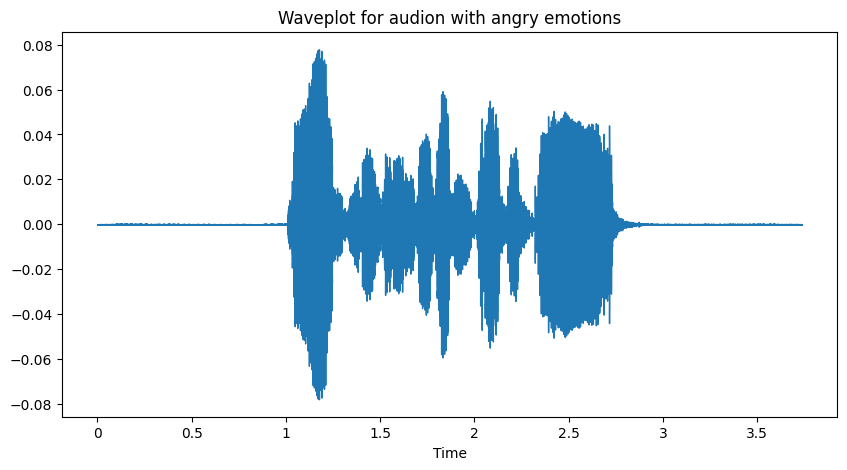

In [ ]:
# angry
audio_visual(audio_df['path'][0],emotion='angry')

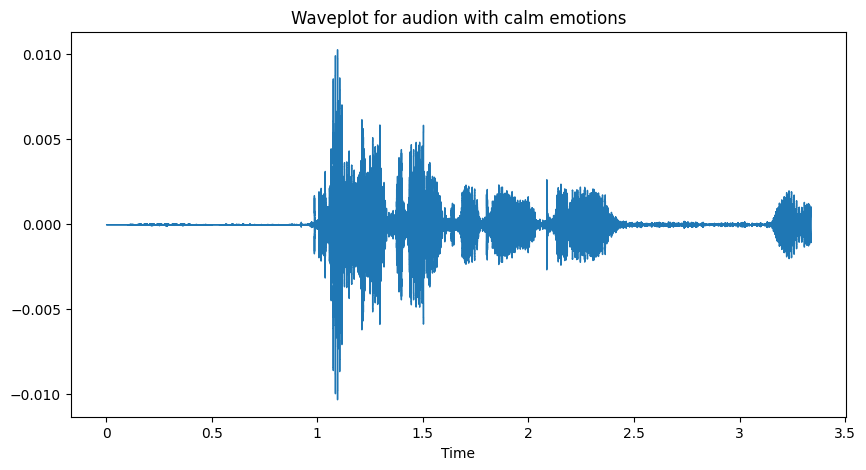

In [ ]:
# calm
audio_visual(audio_df['path'][1],emotion = 'calm')

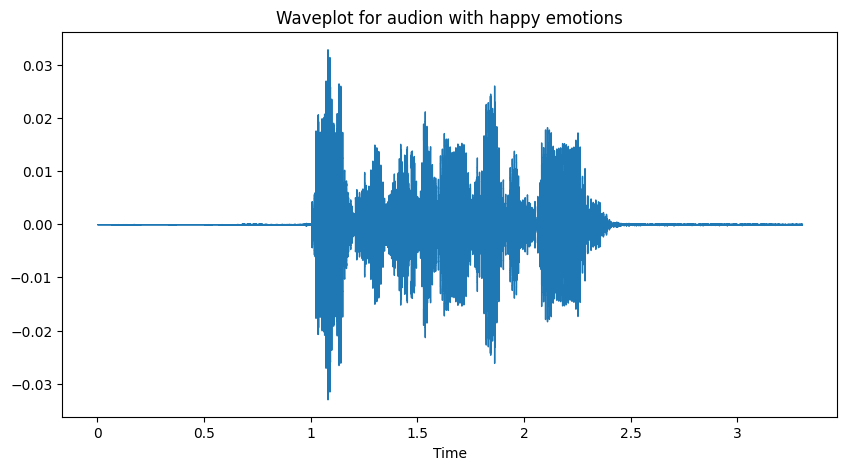

In [ ]:
# happy
audio_visual(audio_df['path'][2],emotion = 'happy')

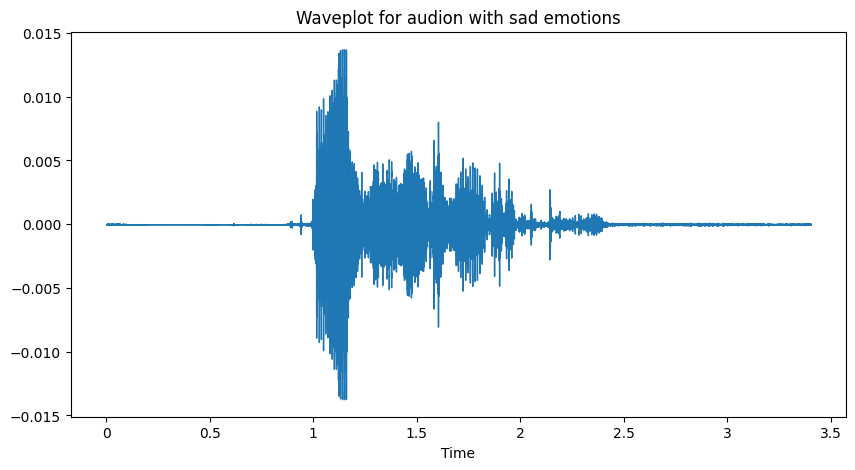

In [ ]:
# sad
audio_visual(audio_df['path'][3],emotion = 'sad')

## **Data Augmentation**

In [ ]:
def feature_extraction(file) :
  mfcc_features = librosa.feature.mfcc(y=file,sr = sample_rate,n_mfcc = 40)
  mfcc_scaled_feature = np.mean(mfcc_features.T,axis = 0)
  return mfcc_scaled_feature

  # NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data,rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH

def pitch(data, sr=sample_rate, n_steps=0.7):
    return librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=0.7)
#higher speed
def higher_speed(data,rate=1.25):
    return librosa.effects.time_stretch(data, rate= 1.25)
# lower speed
def lower_speed(data, rate = 0.75):
    return librosa.effects.time_stretch(data, rate=0.75)

In [ ]:
# Trying different functions above
path = np.array(audio_df['path'])[471]
data, sample_rate = librosa.load(path)

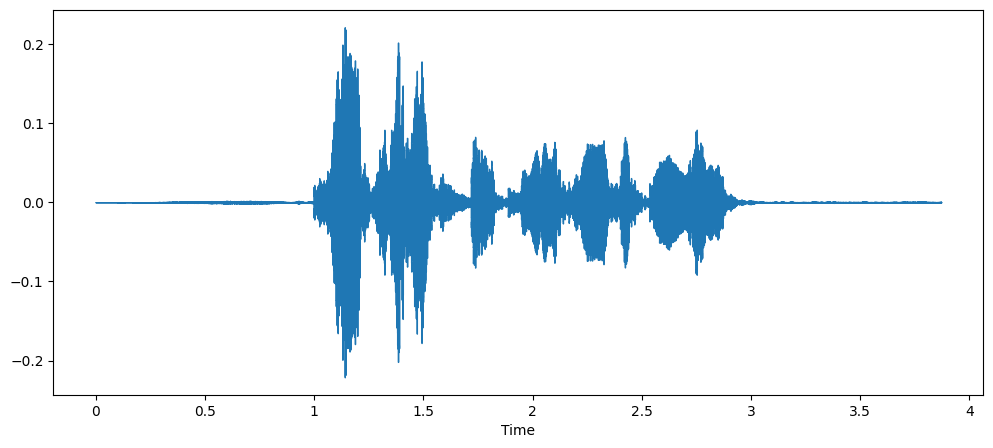

In [ ]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sample_rate)
ipd.Audio(path)

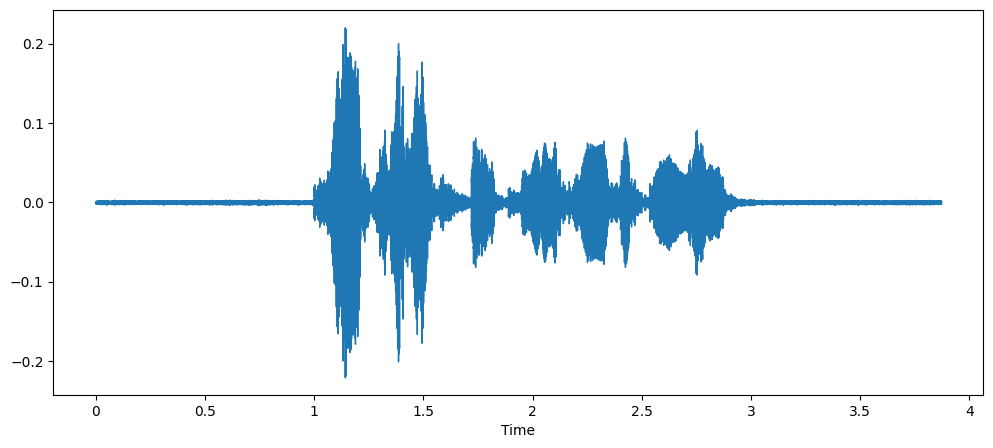

In [ ]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

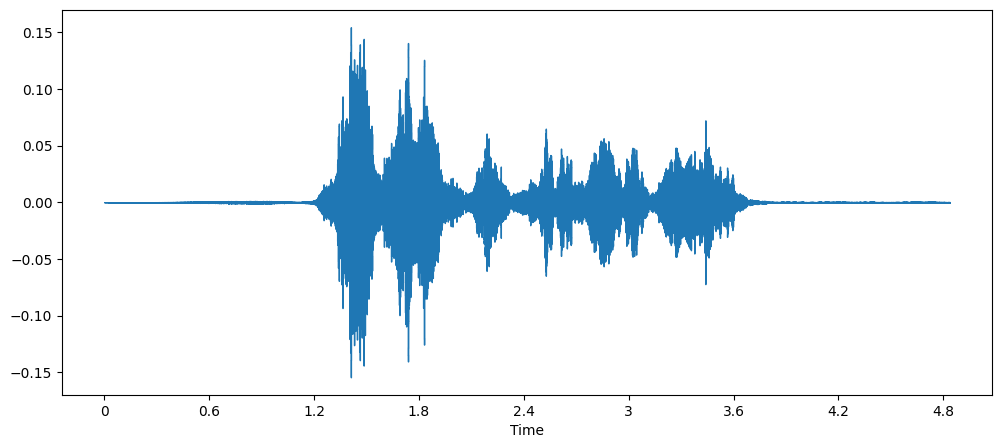

In [ ]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)


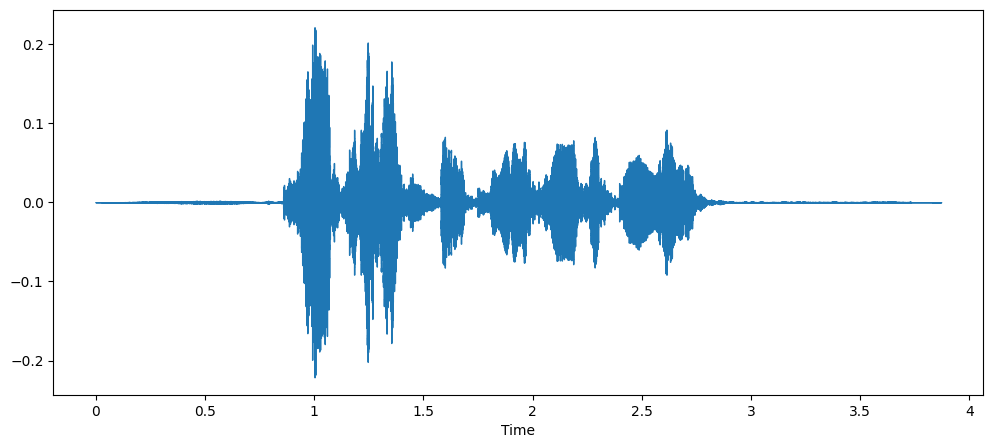

In [ ]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)


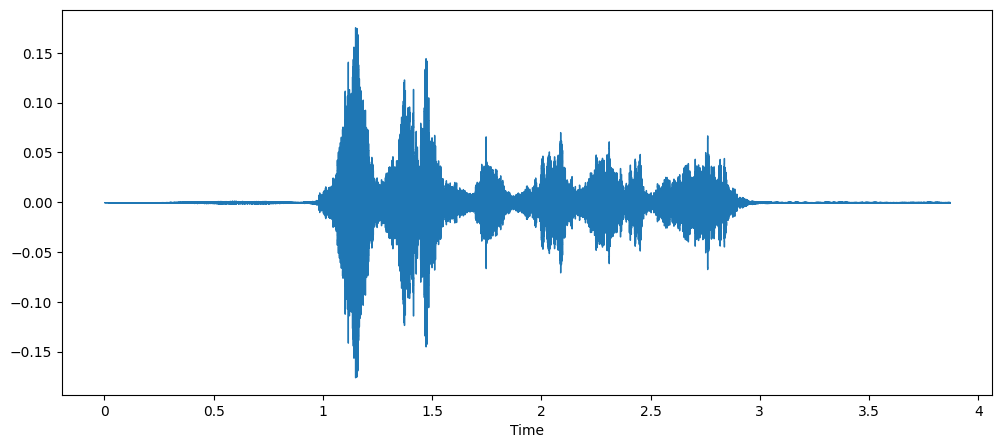

In [ ]:
# AUDIO WITH PITCH
x=pitch(data,sr=sample_rate,n_steps=0.7)

plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

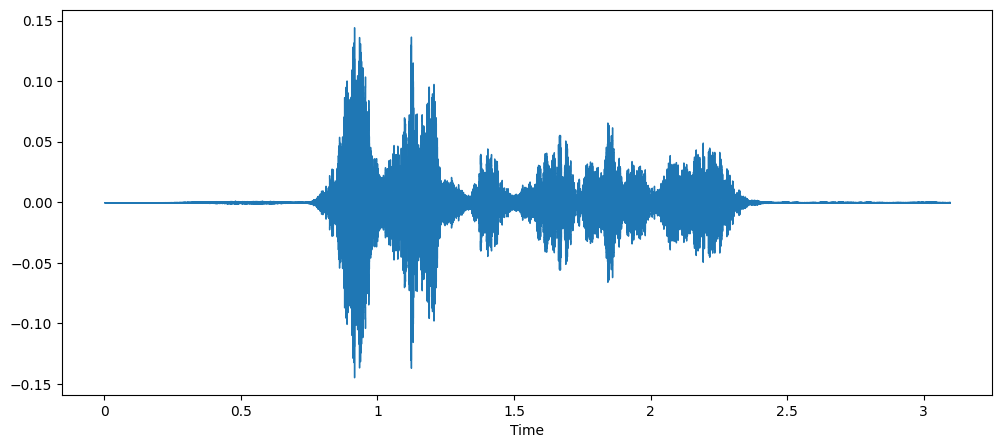

In [ ]:
# AUDIO WITH high speed

x = higher_speed(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)


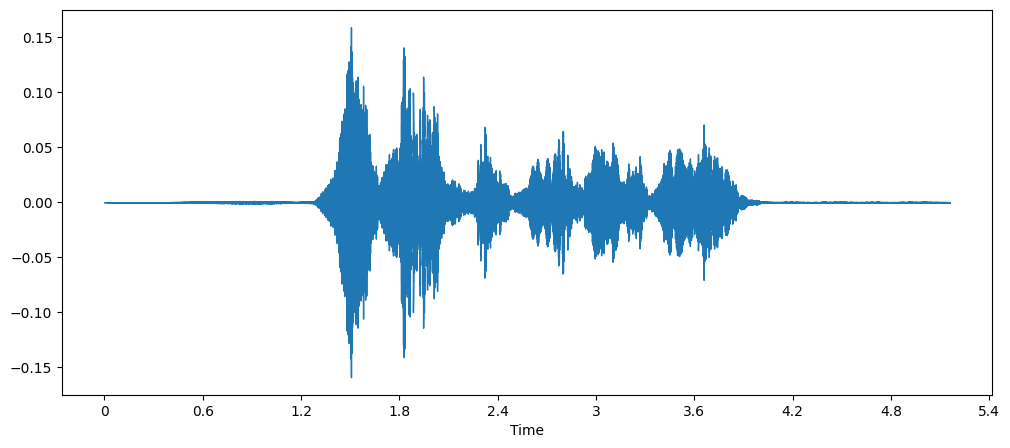

In [ ]:
x = lower_speed(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

In [ ]:
def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feature_extraction(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feature_extraction(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feature_extraction(data_stretch_pitch)
    result = np.vstack((result, res3))
    # data with high speed
    high_speed = higher_speed(data)
    res4 = feature_extraction(high_speed)
    result = np.vstack((result,res4))
    # data with low speed
    low_speed = lower_speed(data)
    res5 = feature_extraction(high_speed)
    result = np.vstack((result,res5))
x    return result

In [ ]:
from tqdm import tqdm
x = []
y = []

for path,emotion in tqdm(zip(audio_df['path'],audio_df['emotion'])):
   feature = get_feat(path)
   for ele in feature :
     x.append(ele)
     y.append(emotion)

1440it [08:33,  2.80it/s]


In [ ]:
Emotions = pd.DataFrame(x)
Emotions['labels'] = y
Emotions.to_csv('/content/drive/MyDrive/Speech Emotion Recognition/emotion.csv', index=False)


In [ ]:
Emotions= pd.read_csv('/content/drive/MyDrive/Speech Emotion Recognition/emotion.csv')
Emotions.head()

0          1          2          3          4         5         6  \
0 -501.081696  80.631348 -17.459999  15.612357  22.746586 -6.106079 -4.648375   
1 -412.845591  48.237304  -5.378325  10.769472  13.713132 -1.968615 -6.792583   
2 -558.551453  74.386047 -19.540365  16.028460  18.349510 -8.989731 -8.212019   
3 -532.449280  83.696083 -17.795982  15.060630  20.281790 -4.328455 -5.372010   
4 -532.449280  83.696083 -17.795982  15.060630  20.281790 -4.328455 -5.372010   

           7          8         9  ...        31        32        33  \
0 -11.032951 -19.127665 -1.756994  ...  0.364710 -1.152829  1.967561   
1 -11.550804 -14.434443 -5.812770  ... -0.616388 -0.670527 -0.260426   
2 -17.906586 -19.683613 -3.479060  ...  0.172563 -1.643630 -0.275823   
3 -14.159784 -20.077438 -2.575803  ...  1.001004 -1.162194  2.544883   
4 -14.159784 -20.077438 -2.575803  ...  1.001004 -1.162194  2.544883   

         34        35        36        37        38        39  labels  
0 -4.860143 -0.568067 -1.615694 -1.060813 -3.508545 -3.144772   angry  
1 -2.808170 -1.588042 -1.607972 -1.954011 -3.938327 -4.207010   angry  
2 -4.257018  2.027807 -4.001072 -3.669624 -7.941972 -4.154356   angry  
3 -5.043760 -0.471919 -2.605560 -1.187694 -4.465712 -3.496712   angry  
4 -5.043760 -0.471919 -2.605560 -1.187694 -4.465712 -3.496712   angry  

[5 rows x 41 columns]

## **DATA PREPROCESSING**

In [ ]:
X = Emotions.drop('labels',axis = 1)
Y = Emotions['labels']

In [ ]:
# since it is a multiclass classifier, i will perform onehotencoding
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,shuffle = True)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5760, 40), (5760, 8), (1440, 40), (1440, 8))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5760, 40), (5760, 8), (1440, 40), (1440, 8))

## **Descion Tree**

In [ ]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print(f'the training score for decision tree is {clf.score(x_train,y_train)}')

the training score for decision tree is 1.0


In [ ]:
print(f'the test score for decision tree is {clf.score(x_test,y_test)}')

the test score for decision tree is 0.6770833333333334


## **MLP CLASSIFIER**

In [ ]:
from sklearn.neural_network import MLPClassifier
clf2=MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)
clf2.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, batch_size=270, hidden_layer_sizes=(400,),
              learning_rate='adaptive', max_iter=400)

In [ ]:
print(f"Training set score: {(clf2.score(x_train, y_train))}")
print(f"Test set score: {(clf2.score(x_test, y_test))}")

Training set score: 0.9998263888888889
Test set score: 0.8458333333333333


## **CNN**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Dense,AveragePooling1D,Dropout,add,BatchNormalization,LSTM,Flatten,MaxPooling1D,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from keras.activations import relu, softmax
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
#CNN
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((5760, 40, 1), (5760, 8), (1440, 40, 1), (1440, 8))

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=2,)

In [ ]:
my_model=Sequential()
my_model.add(Conv1D(256, kernel_size=7, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())


my_model.add(Conv1D(64, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))
        
my_model.add(Flatten())
my_model.add(Dense(units=32, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(units=8, activation='softmax'))
my_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 256)           2048      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 256)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 20, 256)          1024      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 128)           229504    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 128)          0         
 1D)                                                             
                                                        

In [ ]:
history = my_model.fit(x_traincnn, y_train, batch_size=32, epochs=50, validation_data=(x_testcnn, y_test),callbacks = early_stopping)


Epoch 1/50
180/180 [==============================] - 20s 76ms/step - loss: 2.2447 - accuracy: 0.1951 - val_loss: 2.0930 - val_accuracy: 0.1319
Epoch 2/50
180/180 [==============================] - 13s 70ms/step - loss: 1.9411 - accuracy: 0.2602 - val_loss: 1.9970 - val_accuracy: 0.1660
Epoch 3/50
180/180 [==============================] - 12s 68ms/step - loss: 1.8172 - accuracy: 0.3182 - val_loss: 1.7546 - val_accuracy: 0.3264
Epoch 4/50
180/180 [==============================] - 12s 69ms/step - loss: 1.6139 - accuracy: 0.3957 - val_loss: 1.3651 - val_accuracy: 0.5326
Epoch 5/50
180/180 [==============================] - 13s 73ms/step - loss: 1.4337 - accuracy: 0.4611 - val_loss: 1.1486 - val_accuracy: 0.5861
Epoch 6/50
180/180 [==============================] - 13s 73ms/step - loss: 1.2571 - accuracy: 0.5302 - val_loss: 0.9826 - val_accuracy: 0.6528
Epoch 7/50
180/180 [==============================] - 13s 73ms/step - loss: 1.0978 - accuracy: 0.5922 - val_loss: 0.8613 - val_accuracy:

In [ ]:
print("Accuracy of our model on test data : " , round(my_model.evaluate(x_testcnn,y_test)[1],2)*100 , "%")

45/45 [==============================] - 1s 22ms/step - loss: 0.3637 - accuracy: 0.9069
Accuracy of our model on test data :  91.0 %


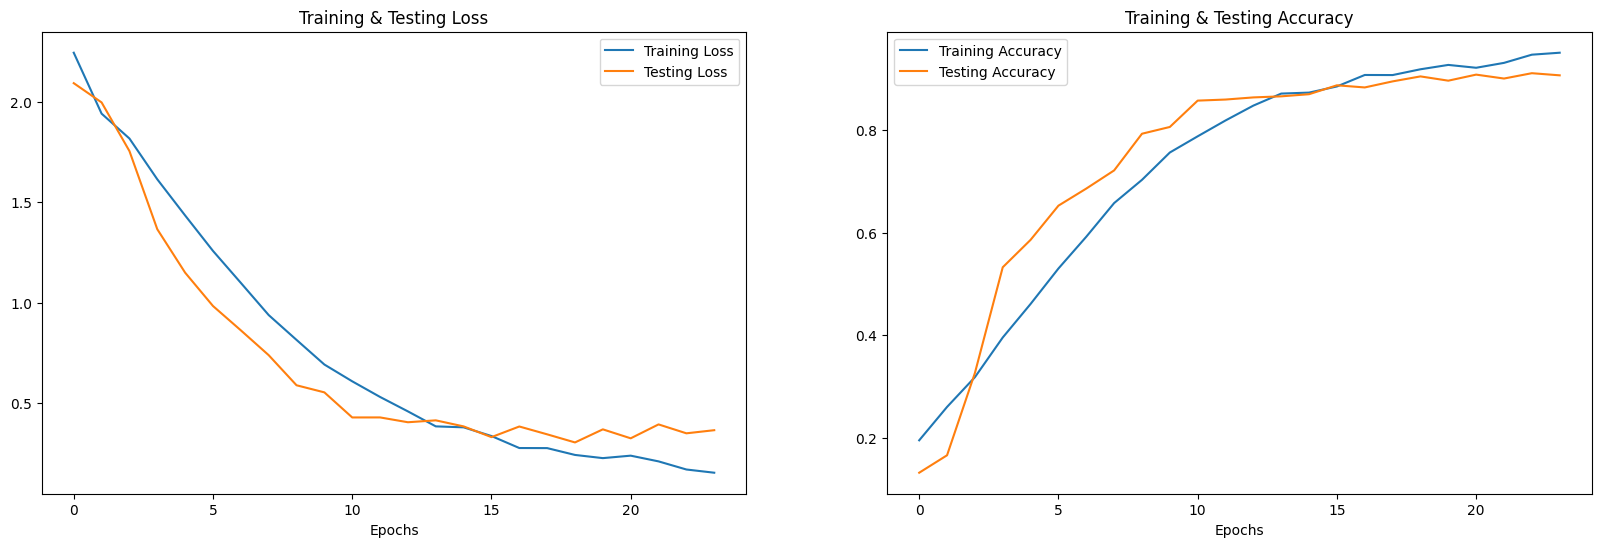

In [ ]:
epochs = [i for i in range(24)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

## **Confusion Matrix**

In [ ]:
# predicting on test data.
pred_test = my_model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

45/45 [==============================] - 1s 22ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

In [ ]:
df

Predicted Labels Actual Labels
0                fear          fear
1                fear          fear
2            suprised      suprised
3            suprised      suprised
4            suprised      suprised
...               ...           ...
1435         suprised      suprised
1436              sad           sad
1437          disgust       disgust
1438              sad           sad
1439              sad       disgust

[1440 rows x 2 columns]

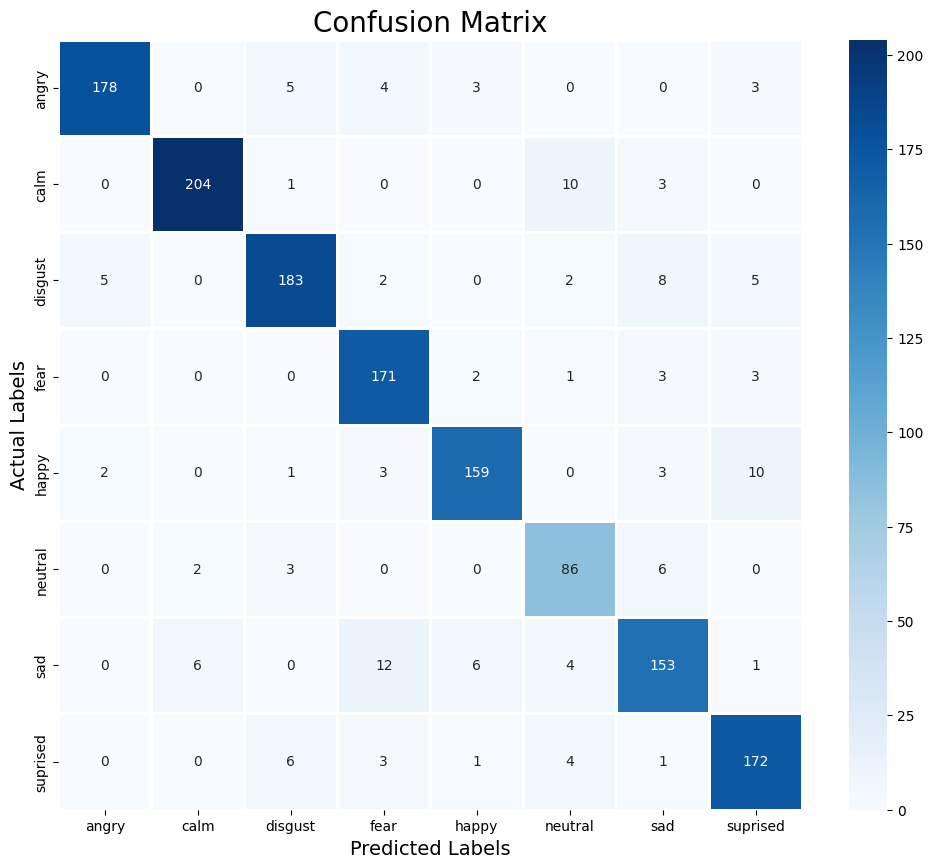

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

THE END !!